In [25]:
import numpy as np
import pandas as pd
import string
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [26]:
%cd /content/

/content


In [27]:
with open("stopwords.txt") as f:
  stopwords=f.read().replace('\n',' ').split()
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [28]:
with open('training.txt',encoding='utf=8') as f:
  text=f.read().replace('\n','')
  print(text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = ''.join([t for t in text if t not in list('0123456789')])
  text = text.replace('”', '').replace('“', '').replace('’', '').lower().split()

text=[w for w in text if w not in stopwords][:2000]
text


Today we will be learning about the fundamentals of data science and statistics. Data Science and statistics are hot and growing fields with alternative names of machine learning, artificial intelligence, big data, etc. I'm really excited to talk to you about data science and statistics because data science and statistics have long been a passions of mine. I didn't used to be very good at data science and statistics but after studying data science and statistics for a long time, I got better and better at it until I became a data science and statistics expert. I'm really excited to talk to you about data science and statistics, thanks for listening to me talk about data science and statistics.


['today',
 'learning',
 'fundamentals',
 'data',
 'science',
 'statistics',
 'data',
 'science',
 'statistics',
 'hot',
 'growing',
 'fields',
 'alternative',
 'names',
 'machine',
 'learning',
 'artificial',
 'intelligence',
 'big',
 'data',
 'etc',
 'im',
 'really',
 'excited',
 'talk',
 'data',
 'science',
 'statistics',
 'data',
 'science',
 'statistics',
 'long',
 'passions',
 'mine',
 'didnt',
 'used',
 'good',
 'data',
 'science',
 'statistics',
 'studying',
 'data',
 'science',
 'statistics',
 'long',
 'time',
 'got',
 'better',
 'better',
 'became',
 'data',
 'science',
 'statistics',
 'expert',
 'im',
 'really',
 'excited',
 'talk',
 'data',
 'science',
 'statistics',
 'thanks',
 'listening',
 'talk',
 'data',
 'science',
 'statistics']

In [29]:
WINDOW_SIZE=3
NUM_NEGATIVE_SAMPLES=3

data=[]
# print(text)
# print(text[WINDOW_SIZE])
# print(text[WINDOW_SIZE-1:-WINDOW_SIZE])

for i,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):
   context_words = [context_word for context_word in text[i:i+2*WINDOW_SIZE-1] if context_word != center_word]
   print(text[i],i,context_words)



today 0 ['today', 'learning', 'data', 'science']
learning 1 ['learning', 'fundamentals', 'science', 'statistics']
fundamentals 2 ['fundamentals', 'data', 'statistics', 'data']
data 3 ['data', 'science', 'data', 'science']
science 4 ['science', 'statistics', 'science', 'statistics']
statistics 5 ['statistics', 'data', 'statistics', 'hot']
data 6 ['data', 'science', 'hot', 'growing']
science 7 ['science', 'statistics', 'growing', 'fields']
statistics 8 ['statistics', 'hot', 'fields', 'alternative']
hot 9 ['hot', 'growing', 'alternative', 'names']
growing 10 ['growing', 'fields', 'names', 'machine']
fields 11 ['fields', 'alternative', 'machine', 'learning']
alternative 12 ['alternative', 'names', 'learning', 'artificial']
names 13 ['names', 'machine', 'artificial', 'intelligence']
machine 14 ['machine', 'learning', 'intelligence', 'big']
learning 15 ['learning', 'artificial', 'big', 'data']
artificial 16 ['artificial', 'intelligence', 'data', 'etc']
intelligence 17 ['intelligence', 'big',

In [31]:
data=[]
for i,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):
  context_words = [context_word for context_word in text[i:i+2*WINDOW_SIZE-1] if context_word != center_word]
  for context_word in context_words:
    data.append([center_word,context_word,1])
    negative_samples = np.random.choice([w for w in text[WINDOW_SIZE-1:-WINDOW_SIZE] if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)
    for negative in negative_samples:
      data.append([center_word,negative,0])
print(data)

[['fundamentals', 'today', 1], ['fundamentals', 'listening', 0], ['fundamentals', 'thanks', 0], ['fundamentals', 'im', 0], ['fundamentals', 'learning', 1], ['fundamentals', 'alternative', 0], ['fundamentals', 'better', 0], ['fundamentals', 'alternative', 0], ['fundamentals', 'data', 1], ['fundamentals', 'became', 0], ['fundamentals', 'statistics', 0], ['fundamentals', 'became', 0], ['fundamentals', 'science', 1], ['fundamentals', 'got', 0], ['fundamentals', 'better', 0], ['fundamentals', 'long', 0], ['data', 'learning', 1], ['data', 'hot', 0], ['data', 'better', 0], ['data', 'talk', 0], ['data', 'fundamentals', 1], ['data', 'really', 0], ['data', 'talk', 0], ['data', 'etc', 0], ['data', 'science', 1], ['data', 'really', 0], ['data', 'names', 0], ['data', 'really', 0], ['data', 'statistics', 1], ['data', 'names', 0], ['data', 'thanks', 0], ['data', 'got', 0], ['science', 'fundamentals', 1], ['science', 'alternative', 0], ['science', 'studying', 0], ['science', 'long', 0], ['science', 'd

In [43]:
df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
words = np.intersect1d(df.context_word, df.center_word)
print(words)
print(df.context_word.isin(words).unique())
# print(df.center_word==words)
df = df[(df.center_word.isin(words)) & (df.context_word.isin(words))].reset_index(drop=True)

['alternative' 'artificial' 'became' 'better' 'big' 'data' 'didnt' 'etc'
 'excited' 'expert' 'fields' 'fundamentals' 'good' 'got' 'growing' 'hot'
 'im' 'intelligence' 'learning' 'listening' 'long' 'machine' 'mine'
 'names' 'passions' 'really' 'science' 'statistics' 'studying' 'talk'
 'thanks' 'time' 'used']
[False  True]


In [36]:
df

,center_word,context_word,label
0,fundamentals,listening,0
1,fundamentals,thanks,0
2,fundamentals,im,0
3,fundamentals,learning,1
4,fundamentals,alternative,0
...,...,...,...
978,talk,intelligence,0
979,talk,science,1
980,talk,didnt,0
981,talk,fundamentals,0


In [10]:
def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale*v))

In [44]:
def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):
    
    #get differences between main embeddings and corresponding context embeddings
    main_embeddings_center = main_embeddings.loc[df.center_word].values
    context_embeddings_context = context_embeddings.loc[df.context_word].values
    print(main_embeddings_center,context_embeddings_context)
    diffs = context_embeddings_context - main_embeddings_center
    
    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df.label - scores).values.reshape(-1,1)
    
    #calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()
    
    if debug:
        plot_words(debug)
    
    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]
    
    #normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)
    
    #return the updated embeddings
    return main_embeddings, context_embeddings

In [45]:
def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')

In [46]:
def plot_words(debug):
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    lim_main_first = main_embeddings.loc[[debug[0]]]
    lim_main_second = main_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main_first[0], lim_main_first[1], color='r')
    plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_first.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_main_second[0], lim_main_second[1], color='r')
    plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_second.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], main_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    t = np.arange(0, 3.14*2+0.1, 0.1)
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    ###################################
    
    plt.subplot(1,2,2)
    lim_main = main_embeddings.loc[[debug[0]]]
    lim_context = context_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main[0], lim_main[1], color='r')
    plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_context[0], lim_context[1], color='b')
    plt.arrow(0,0,float(lim_context[0]), float(lim_context[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_context.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], context_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    plt.show()

[[ 0.73459814  0.44968319 -0.19165507  0.42552381  0.20086916]
 [ 0.73459814  0.44968319 -0.19165507  0.42552381  0.20086916]
 [ 0.73459814  0.44968319 -0.19165507  0.42552381  0.20086916]
 ...
 [ 0.76232903 -0.14410618 -0.36823045 -0.50882384 -0.05993741]
 [ 0.76232903 -0.14410618 -0.36823045 -0.50882384 -0.05993741]
 [ 0.76232903 -0.14410618 -0.36823045 -0.50882384 -0.05993741]] [[ 0.00541773 -0.99496033 -0.01216555 -0.06609477 -0.07421636]
 [ 0.58519515 -0.54536011 -0.29991932  0.17596972  0.48909308]
 [-0.37792966  0.80135466 -0.43670721 -0.06406977  0.14206249]
 ...
 [-0.41662626 -0.02758171 -0.3773507   0.25535935  0.78616783]
 [-0.29641312 -0.12430438 -0.22767671  0.43822762  0.80796507]
 [ 0.35777407  0.64340502 -0.48259651  0.09806029  0.46423323]]


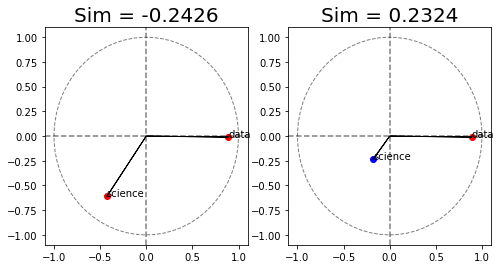

[[ 0.7506182   0.43416184 -0.12284722  0.44433812  0.18854176]
 [ 0.7506182   0.43416184 -0.12284722  0.44433812  0.18854176]
 [ 0.7506182   0.43416184 -0.12284722  0.44433812  0.18854176]
 ...
 [ 0.749678   -0.23009166 -0.33995839 -0.32263004 -0.40666802]
 [ 0.749678   -0.23009166 -0.33995839 -0.32263004 -0.40666802]
 [ 0.749678   -0.23009166 -0.33995839 -0.32263004 -0.40666802]] [[ 0.02688881 -0.98381537 -0.15682547 -0.03425965 -0.07494244]
 [ 0.46666849 -0.52155521 -0.41803378  0.08707439  0.57259627]
 [-0.47623214  0.73442545 -0.46774575  0.00443898  0.12254149]
 ...
 [-0.49033003  0.03441512 -0.39739777  0.18614131  0.75220907]
 [-0.37467243 -0.2116009  -0.21506612  0.49112393  0.72621586]
 [ 0.13449051  0.54412034 -0.6335599   0.10145082  0.52359808]]


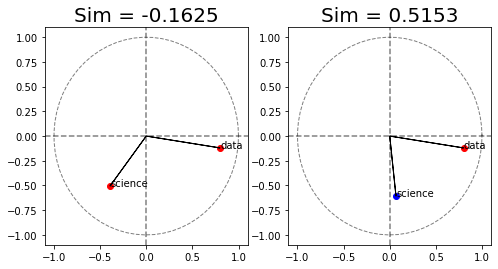

[[ 0.78708832  0.41355212 -0.04387951  0.41248169  0.19339093]
 [ 0.78708832  0.41355212 -0.04387951  0.41248169  0.19339093]
 [ 0.78708832  0.41355212 -0.04387951  0.41248169  0.19339093]
 ...
 [ 0.7363202  -0.2032429  -0.32488183 -0.18770935 -0.5251113 ]
 [ 0.7363202  -0.2032429  -0.32488183 -0.18770935 -0.5251113 ]
 [ 0.7363202  -0.2032429  -0.32488183 -0.18770935 -0.5251113 ]] [[ 0.04312747 -0.95493776 -0.2807622   0.01104244 -0.08534956]
 [ 0.33885586 -0.47827524 -0.50333243  0.03607209  0.63386495]
 [-0.49068815  0.65902658 -0.55946729  0.04845842  0.09776109]
 ...
 [-0.53780594  0.08857803 -0.40555874  0.14638269  0.71903611]
 [-0.41778155 -0.2917618  -0.25783308  0.50698664  0.6456162 ]
 [-0.02436395  0.36899008 -0.79927269  0.05686204  0.47030055]]


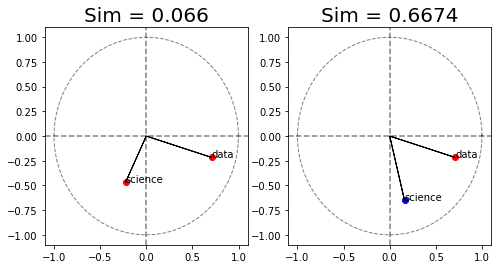

[[ 0.82110906  0.39446754  0.05435249  0.36017627  0.19363403]
 [ 0.82110906  0.39446754  0.05435249  0.36017627  0.19363403]
 [ 0.82110906  0.39446754  0.05435249  0.36017627  0.19363403]
 ...
 [ 0.73494525 -0.16548261 -0.28458876 -0.13607538 -0.57703008]
 [ 0.73494525 -0.16548261 -0.28458876 -0.13607538 -0.57703008]
 [ 0.73494525 -0.16548261 -0.28458876 -0.13607538 -0.57703008]] [[ 0.04193887 -0.91397539 -0.38633813  0.05826235 -0.10118532]
 [ 0.21644707 -0.42447744 -0.5637227   0.01967942  0.67438788]
 [-0.47838364  0.58925332 -0.63993947  0.07715656  0.0919454 ]
 ...
 [-0.57267036  0.14139591 -0.39970364  0.13082088  0.68933211]
 [-0.4521197  -0.33133583 -0.31830265  0.49921592  0.57902611]
 [-0.1355567   0.2374777  -0.87259894  0.00752788  0.40465188]]


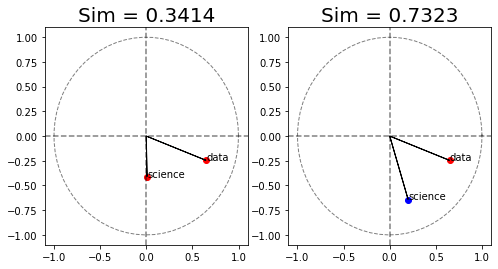

[[ 0.84529295  0.37272996  0.15913744  0.29542623  0.18425749]
 [ 0.84529295  0.37272996  0.15913744  0.29542623  0.18425749]
 [ 0.84529295  0.37272996  0.15913744  0.29542623  0.18425749]
 ...
 [ 0.74770526 -0.13627244 -0.21603811 -0.13553249 -0.5977668 ]
 [ 0.74770526 -0.13627244 -0.21603811 -0.13553249 -0.5977668 ]
 [ 0.74770526 -0.13627244 -0.21603811 -0.13553249 -0.5977668 ]] [[ 0.02027298 -0.86442486 -0.47593423  0.10239147 -0.12394052]
 [ 0.0982114  -0.37829437 -0.60745822  0.02352871  0.69115035]
 [-0.46524866  0.52422903 -0.70048515  0.09784568  0.09205641]
 ...
 [-0.60352535  0.18332132 -0.38519718  0.12917217  0.66112641]
 [-0.47974464 -0.33748879 -0.37877735  0.48045685  0.53069325]
 [-0.20557166  0.16685568 -0.89102377 -0.03035455  0.36749791]]


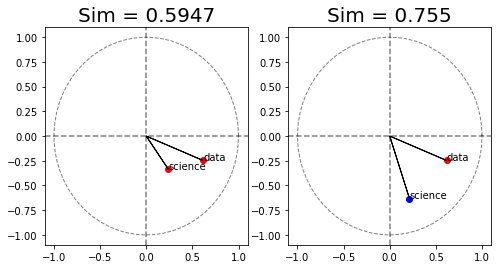

[[ 0.85688508  0.34847975  0.25501586  0.22598705  0.16794819]
 [ 0.85688508  0.34847975  0.25501586  0.22598705  0.16794819]
 [ 0.85688508  0.34847975  0.25501586  0.22598705  0.16794819]
 ...
 [ 0.76467202 -0.11552424 -0.13743168 -0.15899605 -0.59813347]
 [ 0.76467202 -0.11552424 -0.13743168 -0.15899605 -0.59813347]
 [ 0.76467202 -0.11552424 -0.13743168 -0.15899605 -0.59813347]] [[-0.01526233 -0.8111875  -0.54591893  0.14037752 -0.15494702]
 [-0.01293197 -0.34600834 -0.63874978  0.03716576  0.68609651]
 [-0.45778665  0.462322   -0.74581944  0.11546762  0.08432288]
 ...
 [-0.63377482  0.21196846 -0.36543057  0.13506566  0.63373229]
 [-0.50033243 -0.32288968 -0.43170012  0.45987292  0.49755564]
 [-0.24967823  0.13298592 -0.89203903 -0.05562603  0.34806269]]


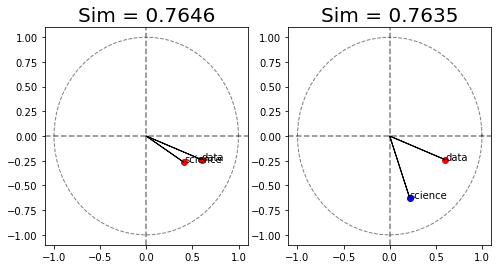

[[ 0.85766044  0.32567081  0.33203254  0.15973898  0.15031616]
 [ 0.85766044  0.32567081  0.33203254  0.15973898  0.15031616]
 [ 0.85766044  0.32567081  0.33203254  0.15973898  0.15031616]
 ...
 [ 0.77938846 -0.09973954 -0.06607623 -0.18619376 -0.58614969]
 [ 0.77938846 -0.09973954 -0.06607623 -0.18619376 -0.58614969]
 [ 0.77938846 -0.09973954 -0.06607623 -0.18619376 -0.58614969]] [[-0.05427285 -0.75940929 -0.5953952   0.17095573 -0.19139142]
 [-0.11189644 -0.32700075 -0.65901548  0.05329573  0.66588877]
 [-0.45259706  0.40495905 -0.78061632  0.13161697  0.06692682]
 ...
 [-0.66282463  0.22978431 -0.34217616  0.1444383   0.60820698]
 [-0.51372131 -0.2956153  -0.4760001   0.44192651  0.47626346]
 [-0.27655459  0.11727652 -0.88996768 -0.07329431  0.3351854 ]]


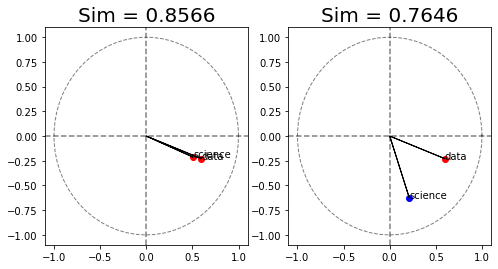

[[ 0.85200944  0.30738298  0.38880005  0.10097192  0.13503631]
 [ 0.85200944  0.30738298  0.38880005  0.10097192  0.13503631]
 [ 0.85200944  0.30738298  0.38880005  0.10097192  0.13503631]
 ...
 [ 0.79022091 -0.08699351 -0.0101424  -0.20852462 -0.56955919]
 [ 0.79022091 -0.08699351 -0.0101424  -0.20852462 -0.56955919]
 [ 0.79022091 -0.08699351 -0.0101424  -0.20852462 -0.56955919]] [[-0.09035072 -0.71199742 -0.62825238  0.19469055 -0.22867218]
 [-0.19608325 -0.3184936  -0.67008463  0.0680366   0.63755062]
 [-0.44604084  0.35334292 -0.8081224   0.14596042  0.04277972]
 ...
 [-0.68963575  0.23999179 -0.31696423  0.15476047  0.58514045]
 [-0.52112013 -0.26106258 -0.51266093  0.42758256  0.463284  ]
 [-0.29122239  0.10976032 -0.88936005 -0.08793302  0.32318521]]


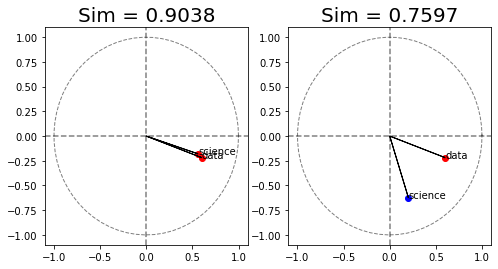

[[ 0.84362905  0.29454926  0.4286808   0.05053833  0.12332641]
 [ 0.84362905  0.29454926  0.4286808   0.05053833  0.12332641]
 [ 0.84362905  0.29454926  0.4286808   0.05053833  0.12332641]
 ...
 [ 0.79798256 -0.0763199   0.02994074 -0.22509789 -0.55302225]
 [ 0.79798256 -0.0763199   0.02994074 -0.22509789 -0.55302225]
 [ 0.79798256 -0.0763199   0.02994074 -0.22509789 -0.55302225]] [[-0.1214421  -0.66973942 -0.64947162  0.2130794  -0.2635995 ]
 [-0.26590322 -0.31773207 -0.6744736   0.08032458  0.60578473]
 [-0.43656799  0.30788757 -0.83033945  0.15787821  0.01498356]
 ...
 [-0.71366126  0.24515299 -0.29128278  0.16488303  0.56440725]
 [-0.5241648  -0.22303658 -0.54276947  0.41639792  0.45554366]
 [-0.29705121  0.10582576 -0.891301   -0.10162836  0.30954111]]


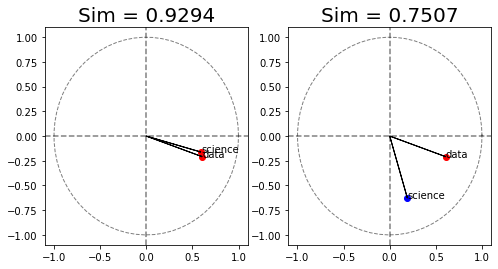

[[ 0.83460251  0.28682929  0.45591156  0.00773366  0.11511924]
 [ 0.83460251  0.28682929  0.45591156  0.00773366  0.11511924]
 [ 0.83460251  0.28682929  0.45591156  0.00773366  0.11511924]
 ...
 [ 0.80379479 -0.06717395  0.05728963 -0.2374901  -0.53825453]
 [ 0.80379479 -0.06717395  0.05728963 -0.2374901  -0.53825453]
 [ 0.80379479 -0.06717395  0.05728963 -0.2374901  -0.53825453]] [[-0.14753142 -0.63242568 -0.66302767  0.22758151 -0.29474262]
 [-0.32328091 -0.32259053 -0.6745542   0.09042165  0.57290956]
 [-0.42433682  0.26842608 -0.84843099  0.16688174 -0.01417887]
 ...
 [-0.73481006  0.24693708 -0.26638039  0.17441593  0.54561601]
 [-0.52437035 -0.18429865 -0.56712652  0.40764207  0.45084943]
 [-0.29640875  0.10357301 -0.89561066 -0.11480779  0.29345393]]


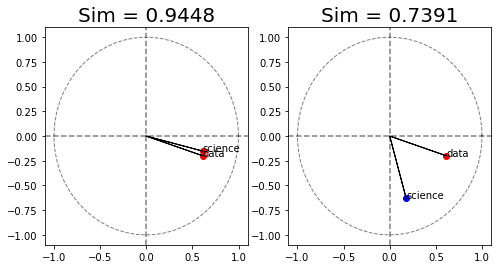

[[ 0.82586166  0.28342222  0.47405354 -0.02852868  0.109926  ]
 [ 0.82586166  0.28342222  0.47405354 -0.02852868  0.109926  ]
 [ 0.82586166  0.28342222  0.47405354 -0.02852868  0.109926  ]
 ...
 [ 0.80841546 -0.05920251  0.07545469 -0.24731301 -0.52545444]
 [ 0.80841546 -0.05920251  0.07545469 -0.24731301 -0.52545444]
 [ 0.80841546 -0.05920251  0.07545469 -0.24731301 -0.52545444]] [[-0.16920758 -0.59956467 -0.67164663  0.23928186 -0.32175456]
 [-0.37037884 -0.33147984 -0.67209672  0.09892881  0.53985156]
 [-0.41031978  0.23451692 -0.86309726  0.17274988 -0.04312879]
 ...
 [-0.7532532   0.2463577  -0.24314021  0.18326685  0.52840666]
 [-0.52301607 -0.14690678 -0.5863638   0.40068302  0.44777583]
 [-0.29101702  0.10227111 -0.90168469 -0.12722094  0.27500776]]


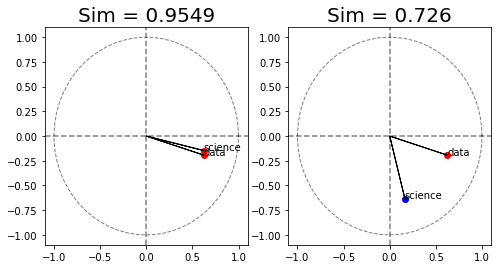

[[ 0.81773818  0.28343806  0.48576267 -0.05928377  0.10717834]
 [ 0.81773818  0.28343806  0.48576267 -0.05928377  0.10717834]
 [ 0.81773818  0.28343806  0.48576267 -0.05928377  0.10717834]
 ...
 [ 0.8122768  -0.05214164  0.08728238 -0.25564262 -0.51431147]
 [ 0.8122768  -0.05214164  0.08728238 -0.25564262 -0.51431147]
 [ 0.8122768  -0.05214164  0.08728238 -0.25564262 -0.51431147]] [[-0.18713839 -0.57065913 -0.67710415  0.24891092 -0.34481981]
 [-0.40908485 -0.34315463 -0.66827371  0.10640555  0.5069345 ]
 [-0.3956242   0.20562632 -0.87484526  0.17559227 -0.07079851]
 ...
 [-0.7692939   0.24403682 -0.22208858  0.19144411  0.51250243]
 [-0.52108793 -0.11227897 -0.60111995  0.39508189  0.44545023]
 [-0.28221136  0.1015941  -0.90885816 -0.1384421   0.25464883]]


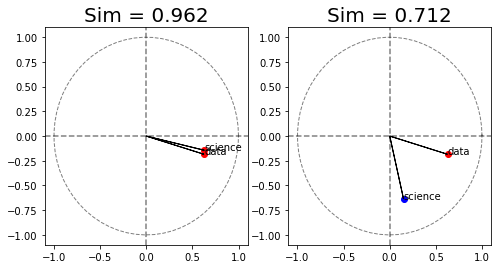

[[ 0.81029732  0.28603468  0.49295047 -0.08541172  0.1063348 ]
 [ 0.81029732  0.28603468  0.49295047 -0.08541172  0.1063348 ]
 [ 0.81029732  0.28603468  0.49295047 -0.08541172  0.1063348 ]
 ...
 [ 0.81562191 -0.04578029  0.09480371 -0.26307613 -0.50444848]
 [ 0.81562191 -0.04578029  0.09480371 -0.26307613 -0.50444848]
 [ 0.81562191 -0.04578029  0.09480371 -0.26307613 -0.50444848]] [[-0.20192789 -0.54527422 -0.6805387   0.25694985 -0.36434189]
 [-0.44091679 -0.35659639 -0.6638223   0.11327447  0.47427866]
 [-0.38115463  0.18119149 -0.88412294  0.17579578 -0.09650526]
 ...
 [-0.78328561  0.24037597 -0.20347165  0.19898811  0.4976807 ]
 [-0.51924063 -0.08118951 -0.61210648  0.39057164  0.44336992]
 [-0.27108595  0.10130159 -0.91655607 -0.14808028  0.23291111]]


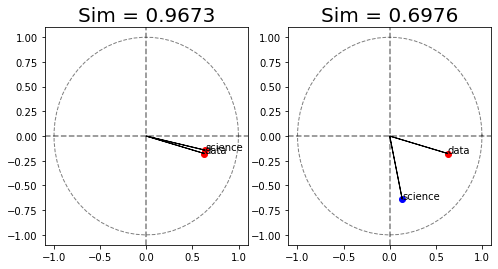

[[ 0.80350255  0.29046739  0.49698625 -0.10764012  0.10691404]
 [ 0.80350255  0.29046739  0.49698625 -0.10764012  0.10691404]
 [ 0.80350255  0.29046739  0.49698625 -0.10764012  0.10691404]
 ...
 [ 0.81859229 -0.03995145  0.09941975 -0.26990438 -0.49555815]
 [ 0.81859229 -0.03995145  0.09941975 -0.26990438 -0.49555815]
 [ 0.81859229 -0.03995145  0.09941975 -0.26990438 -0.49555815]] [[-0.21409261 -0.52303529 -0.68267926  0.26372405 -0.38078483]
 [-0.46706556 -0.37096469 -0.65920217  0.11982216  0.44196166]
 [-0.36752785  0.16063718 -0.89135318  0.17390115 -0.11986188]
 ...
 [-0.79557756  0.23565078 -0.18734321  0.20594944  0.48374829]
 [-0.51782702 -0.05387144 -0.62006407  0.38699497  0.44125783]
 [-0.25855327  0.10114175 -0.92434023 -0.15585911  0.21029416]]


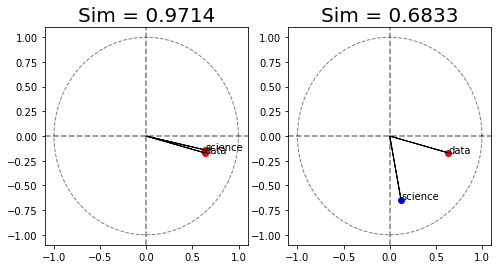

[[ 0.79728903  0.29610649  0.4988563  -0.12656978  0.10850639]
 [ 0.79728903  0.29610649  0.4988563  -0.12656978  0.10850639]
 [ 0.79728903  0.29610649  0.4988563  -0.12656978  0.10850639]
 ...
 [ 0.82127343 -0.03452646  0.10209892 -0.27625443 -0.48741889]
 [ 0.82127343 -0.03452646  0.10209892 -0.27625443 -0.48741889]
 [ 0.82127343 -0.03452646  0.10209892 -0.27625443 -0.48741889]] [[-0.22406638 -0.50361156 -0.68399471  0.26946609 -0.39459968]
 [-0.48846586 -0.38558121 -0.6547044   0.12622609  0.41006994]
 [-0.35510742  0.14339126 -0.89692529  0.17048174 -0.14070775]
 ...
 [-0.80648336  0.2300597  -0.17363725  0.21238313  0.4705323 ]
 [-0.51697958 -0.03020026 -0.62568803  0.38424816  0.4389623 ]
 [-0.24536015  0.1008488  -0.93190807 -0.16163552  0.18721439]]


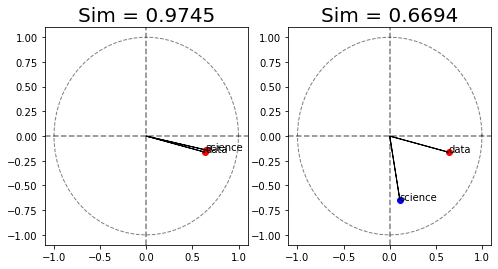

[[ 0.79159314  0.30243971  0.49927529 -0.14270026  0.11077613]
 [ 0.79159314  0.30243971  0.49927529 -0.14270026  0.11077613]
 [ 0.79159314  0.30243971  0.49927529 -0.14270026  0.11077613]
 ...
 [ 0.82371907 -0.0294055   0.10351948 -0.28218037 -0.47987516]
 [ 0.82371907 -0.0294055   0.10351948 -0.28218037 -0.47987516]
 [ 0.82371907 -0.0294055   0.10351948 -0.28218037 -0.47987516]] [[-0.23220961 -0.4867029  -0.68478833  0.27435281 -0.4061951 ]
 [-0.50586192 -0.39992145 -0.65051458  0.13258497  0.37870642]
 [-0.34406811  0.1289085  -0.9011804   0.16606073 -0.15905171]
 ...
 [-0.81626853  0.2237477  -0.16221991  0.21834822  0.45787707]
 [-0.5166978  -0.00986886 -0.62957814  0.38224854  0.43639822]
 [-0.23209189  0.10016811 -0.93907118 -0.16538668  0.16398862]]


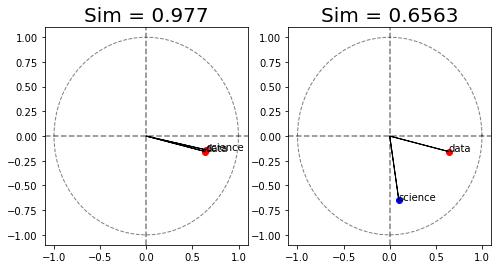

[[ 0.78636222  0.30906548  0.49876207 -0.15645045  0.11345769]
 [ 0.78636222  0.30906548  0.49876207 -0.15645045  0.11345769]
 [ 0.78636222  0.30906548  0.49876207 -0.15645045  0.11345769]
 ...
 [ 0.8259649  -0.02450669  0.10416182 -0.28771317 -0.47281376]
 [ 0.8259649  -0.02450669  0.10416182 -0.28771317 -0.47281376]
 [ 0.8259649  -0.02450669  0.10416182 -0.28771317 -0.47281376]] [[-0.23881851 -0.47203265 -0.685257    0.27852534 -0.41592954]
 [-0.5198597  -0.41360273 -0.64674631  0.13894525  0.3479829 ]
 [-0.33445374  0.11669418 -0.90440403  0.16107029 -0.17502249]
 ...
 [-0.82515035  0.21681755 -0.15292445  0.22390873  0.44564116]
 [-0.51691458  0.00749163 -0.6322225   0.3809216   0.43351659]
 [-0.21918015  0.09887962 -0.94572689 -0.16718102  0.14083337]]


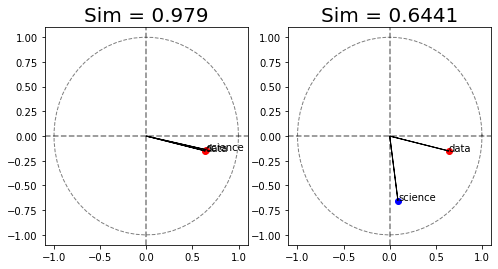

[[ 0.78155567  0.31568058  0.49769163 -0.16817461  0.11634798]
 [ 0.78155567  0.31568058  0.49769163 -0.16817461  0.11634798]
 [ 0.78155567  0.31568058  0.49769163 -0.16817461  0.11634798]
 ...
 [ 0.82803649 -0.01975708  0.10436771 -0.29288414 -0.46614535]
 [ 0.82803649 -0.01975708  0.10436771 -0.29288414 -0.46614535]
 [ 0.82803649 -0.01975708  0.10436771 -0.29288414 -0.46614535]] [[-0.24413425 -0.45934461 -0.68552857  0.28209936 -0.42411263]
 [-0.53096463 -0.42636603 -0.6434596   0.14532163  0.31800932]
 [-0.32622128  0.10631959 -0.90682645  0.15584179 -0.18882517]
 ...
 [-0.83330348  0.20933573 -0.14557455  0.22913442  0.43369267]
 [-0.51753761  0.02224455 -0.63400341  0.38019835  0.43028932]
 [-0.20691994  0.09681018 -0.95183013 -0.16714395  0.11787378]]


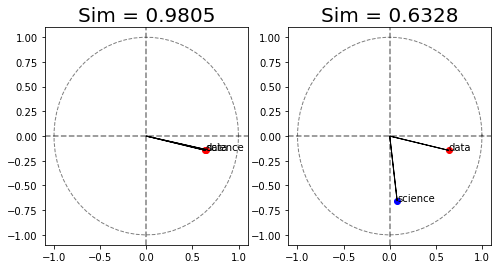

[[ 0.77714284  0.32206505  0.49633172 -0.17817453  0.11929695]
 [ 0.77714284  0.32206505  0.49633172 -0.17817453  0.11929695]
 [ 0.77714284  0.32206505  0.49633172 -0.17817453  0.11929695]
 ...
 [ 0.82995369 -0.01508667  0.10437969 -0.29773293 -0.45979261]
 [ 0.82995369 -0.01508667  0.10437969 -0.29773293 -0.45979261]
 [ 0.82995369 -0.01508667  0.10437969 -0.29773293 -0.45979261]] [[-0.24835192 -0.44840222 -0.68568578  0.28517043 -0.43100999]
 [-0.53960718 -0.43805395 -0.64067305  0.15171164  0.28888483]
 [-0.31927348  0.09742692 -0.90862826  0.15061446 -0.20070478]
 ...
 [-0.84086707  0.20133665 -0.13999981  0.23410089  0.42190396]
 [-0.51847196  0.03471663 -0.63521291  0.38001613  0.42670116]
 [-0.19549433  0.09383585 -0.95736925 -0.16542571  0.09515908]]


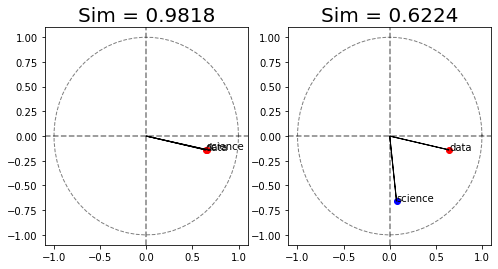

[[ 0.77310006  0.32806653  0.49486978 -0.18670896  0.12219782]
 [ 0.77310006  0.32806653  0.49486978 -0.18670896  0.12219782]
 [ 0.77310006  0.32806653  0.49486978 -0.18670896  0.12219782]
 ...
 [ 0.83173301 -0.01042559  0.10436841 -0.30230748 -0.45368374]
 [ 0.83173301 -0.01042559  0.10436841 -0.30230748 -0.45368374]
 [ 0.83173301 -0.01042559  0.10436841 -0.30230748 -0.45368374]] [[-0.25162909 -0.43898858 -0.68578168  0.287817   -0.43684859]
 [-0.5461593  -0.44858787 -0.63837388  0.15810523  0.26069229]
 [-0.31348281  0.08972563 -0.90994837  0.14555213 -0.21091796]
 ...
 [-0.84795098  0.19282708 -0.13604605  0.23888886  0.41014685]
 [-0.51963107  0.04518756 -0.6360702   0.38031987  0.42274476]
 [-0.18500327  0.08987825 -0.96234719 -0.16217564  0.07268179]]


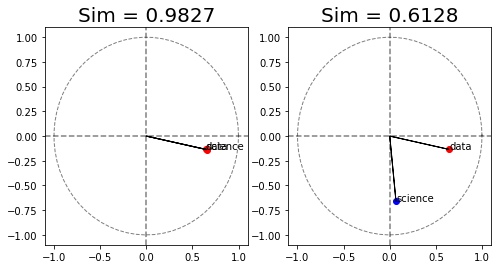

[[ 0.76940806  0.33358536  0.49343318 -0.19400072  0.12497785]
 [ 0.76940806  0.33358536  0.49343318 -0.19400072  0.12497785]
 [ 0.76940806  0.33358536  0.49343318 -0.19400072  0.12497785]
 ...
 [ 0.83338874 -0.00570348  0.10445207 -0.30665996 -0.44775005]
 [ 0.83338874 -0.00570348  0.10445207 -0.30665996 -0.44775005]
 [ 0.83338874 -0.00570348  0.10445207 -0.30665996 -0.44775005]] [[-0.25409353 -0.43090635 -0.68584996  0.2901025  -0.44182188]
 [-0.550945   -0.4579471  -0.63652695  0.16449052  0.23349596]
 [-0.30870919  0.08298381 -0.91089225  0.14076144 -0.21971311]
 ...
 [-0.85464016  0.18379145 -0.13358177  0.24358281  0.39828912]
 [-0.52094097  0.05388968 -0.63673761  0.3810625   0.41841726]
 [-0.17549227  0.0848999  -0.966768   -0.1575249   0.05039854]]


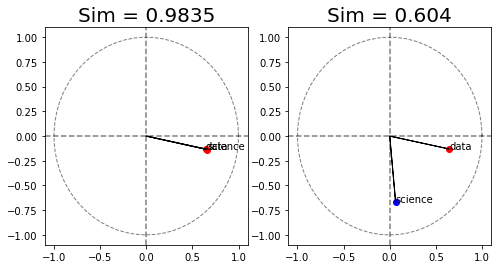

[[ 0.76604996  0.33856154  0.4921049  -0.20024236  0.12759041]
 [ 0.76604996  0.33856154  0.4921049  -0.20024236  0.12759041]
 [ 0.76604996  0.33856154  0.4921049  -0.20024236  0.12759041]
 ...
 [ 0.83493326 -0.00085062  0.10471026 -0.31084155 -0.44192649]
 [ 0.83493326 -0.00085062  0.10471026 -0.31084155 -0.44192649]
 [ 0.83493326 -0.00085062  0.10471026 -0.31084155 -0.44192649]] [[-0.25584989 -0.42397758 -0.68591163  0.29207709 -0.44609423]
 [-0.55424737 -0.46615129 -0.63508282  0.17085715  0.20734147]
 [-0.3048124   0.0770178  -0.91153956  0.13630797 -0.22731791]
 ...
 [-0.86099705  0.17419842 -0.13250137  0.24826877  0.38619296]
 [-0.52234121  0.06101217 -0.63733378  0.38220448  0.41371797]
 [-0.16697807  0.07890138 -0.9706281  -0.15157788  0.02825116]]


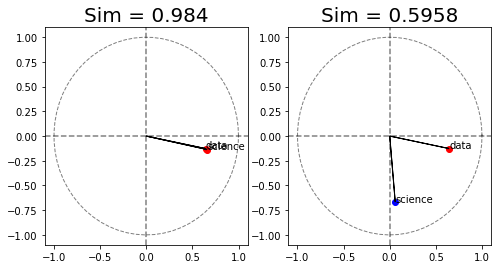

[[ 0.76301006  0.34296373  0.49093562 -0.2056006   0.13000819]
 [ 0.76301006  0.34296373  0.49093562 -0.2056006   0.13000819]
 [ 0.76301006  0.34296373  0.49093562 -0.2056006   0.13000819]
 ...
 [ 0.83637679  0.00419957  0.10519352 -0.31489679 -0.4361543 ]
 [ 0.83637679  0.00419957  0.10519352 -0.31489679 -0.4361543 ]
 [ 0.83637679  0.00419957  0.10519352 -0.31489679 -0.4361543 ]] [[-0.2569853  -0.41804297 -0.68597958  0.29377935 -0.44980477]
 [-0.55631357 -0.47324654 -0.63398437  0.17719782  0.18225715]
 [-0.30166049  0.07168223 -0.91195043  0.13222888 -0.23393279]
 ...
 [-0.867062    0.16400903 -0.13272545  0.25303106  0.37371615]
 [-0.52378403  0.06670691 -0.63794408  0.3837128   0.40864694]
 [-0.15946917  0.07192232 -0.97391158 -0.14441164  0.00618755]]


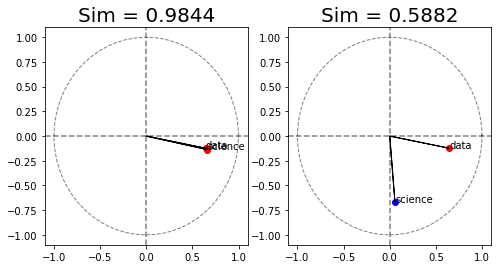

[[ 0.76027324  0.3467805   0.48995302 -0.2102198   0.13221781]
 [ 0.76027324  0.3467805   0.48995302 -0.2102198   0.13221781]
 [ 0.76027324  0.3467805   0.48995302 -0.2102198   0.13221781]
 ...
 [ 0.83772683  0.00950659  0.1059296  -0.31885849 -0.43038537]
 [ 0.83772683  0.00950659  0.1059296  -0.31885849 -0.43038537]
 [ 0.83772683  0.00950659  0.1059296  -0.31885849 -0.43038537]] [[-0.25757382 -0.41296099 -0.68606156  0.29523801 -0.45307064]
 [-0.55735874 -0.47929519 -0.63317207  0.18350896  0.15825597]
 [-0.29913483  0.06686175 -0.91217046  0.12854201 -0.23972872]
 ...
 [-0.8728522   0.15318696 -0.13419775  0.25794789  0.36071685]
 [-0.52523283  0.07109451 -0.63862847  0.38555938  0.40320428]
 [-0.1529801   0.06404601 -0.97658925 -0.13608242 -0.01581819]]


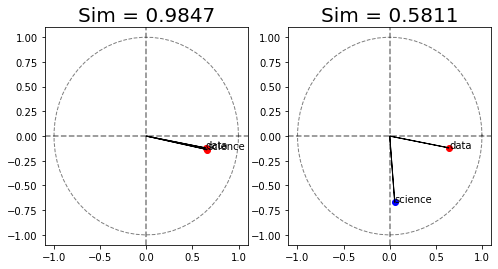

[[ 0.75782475  0.35001365  0.48916868 -0.21422481  0.13421561]
 [ 0.75782475  0.35001365  0.48916868 -0.21422481  0.13421561]
 [ 0.75782475  0.35001365  0.48916868 -0.21422481  0.13421561]
 ...
 [ 0.83898747  0.01511744  0.10692743 -0.32274352 -0.42458761]
 [ 0.83898747  0.01511744  0.10692743 -0.32274352 -0.42458761]
 [ 0.83898747  0.01511744  0.10692743 -0.32274352 -0.42458761]] [[-0.25768015 -0.40860653 -0.68616213  0.29647366 -0.45598963]
 [-0.5575692  -0.48436844 -0.63258759  0.18979072  0.13533745]
 [-0.2971326   0.06246465 -0.91223459  0.12525183 -0.24484774]
 ...
 [-0.87835967  0.14171084 -0.13687815  0.26308527  0.34706317]
 [-0.52666052  0.07427035 -0.63942724  0.38771933  0.3973904 ]
 [-0.14753827  0.055406   -0.97862177 -0.12663816 -0.03774713]]


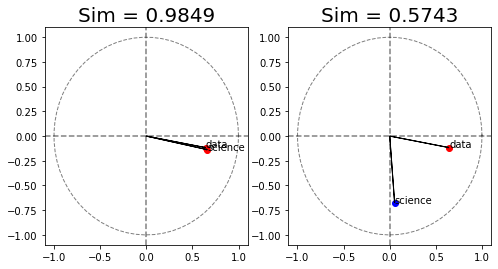

In [47]:
EMBEDDING_SIZE = 5

main_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1,1)
main_embeddings = main_embeddings / row_norms

context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)

for _ in range(25):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1, ['data', 'science'])


In [18]:
df

,center_word,context_word,label
0,fundamentals,good,0
1,fundamentals,excited,0
2,fundamentals,talk,0
3,fundamentals,learning,1
4,fundamentals,growing,0
...,...,...,...
978,talk,really,0
979,talk,science,1
980,talk,really,0
981,talk,really,0
